In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.sparse.linalg

In [ ]:
data = pd.read_csv("Diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data.drop(['Outcome'], inplace = True, axis=1)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


None


Random generation of 2-D data

In [ ]:
mu = np.array([10,13])
sigma = np.array([[3.5, -1.8], [-1.8,3.5]])

print("Mu ", mu.shape)
print("Sigma ", sigma.shape)

x = np.random.multivariate_normal(mu, sigma, size=(1000)).tolist()
dataframe = pd.DataFrame(x)
print("Data shape ", dataframe.shape)


Mu  (2,)
Sigma  (2, 2)
Data shape  (1000, 2)


In [ ]:
dataframe

,0,1
0,4.436880,14.097546
1,9.056089,16.816948
2,8.877405,14.578201
3,9.336558,14.619595
4,10.937233,12.917690
...,...,...
995,10.505279,13.439209
996,12.914502,9.096082
997,11.844990,11.266314
998,7.194075,14.159010


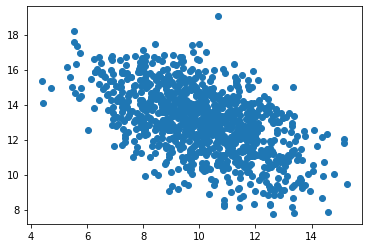

In [ ]:
plt.scatter(dataframe[0], dataframe[1])

In [ ]:
mean = np.mean(dataframe, axis= 0)
print("Mean ", mean.shape)
mean_data = dataframe - mean
print("Data after subtracting mean ", mean_data.shape, "\n")

Mean  (2,)
Data after subtracting mean  (1000, 2) 



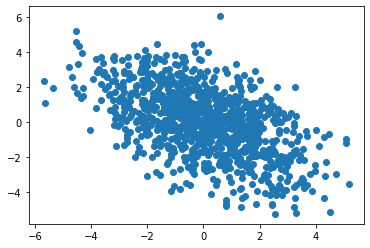

In [ ]:
plt.scatter(mean_data[0], mean_data[1])

In [ ]:
covmat = np.cov(mean_data.T)
covmat = np.round(covmat, 2)
print("Covariance matrix ", covmat.shape, "\n")

Covariance matrix  (2, 2) 



In [ ]:
covmat

array([[ 3.46, -1.87],
       [-1.87,  3.59]])

In [ ]:
eig_val, eig_vec = np.linalg.eig(covmat)
print("Eigen vectors ", eig_vec)
print("Eigen values ", eig_val, "\n")

Eigen vectors  [[-0.7192838   0.69471635]
 [-0.69471635 -0.7192838 ]]
Eigen values  [1.65387066 5.39612934] 



In [ ]:
indices = np.arange(0,len(eig_val), 1)
indices = ([x for _,x in sorted(zip(eig_val, indices))])[::-1]
eig_val = eig_val[indices]
eig_vec = eig_vec[:,indices]
print("Sorted Eigen vectors ", eig_vec)
print("Sorted Eigen values ", eig_val, "\n")

Sorted Eigen vectors  [[ 0.69471635 -0.7192838 ]
 [-0.7192838  -0.69471635]]
Sorted Eigen values  [5.39612934 1.65387066] 



In [ ]:
pca_direction = eig_vec[0]
pca_direction

array([ 0.69471635, -0.7192838 ])

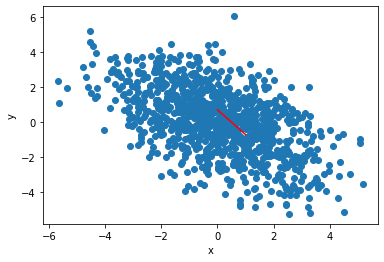

In [ ]:
plt.figure()
ax = plt.axes()
ax.scatter(mean_data[0],mean_data[1])
ax.plot(pca_direction,color='red')

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()